Optimal K value (approx): 18
Confusion Matrix:
 [[  5   0  74   0]
 [  0   0  17   0]
 [ 11   0 229   0]
 [  1   0   9   0]]
F1 Score: 0.5821103641584634
Accuracy Score: 0.6763005780346821


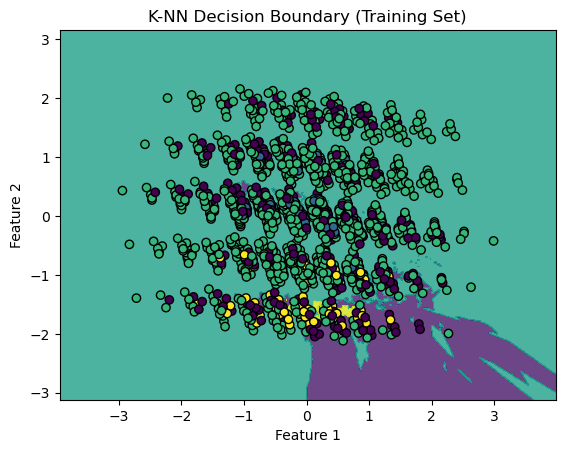

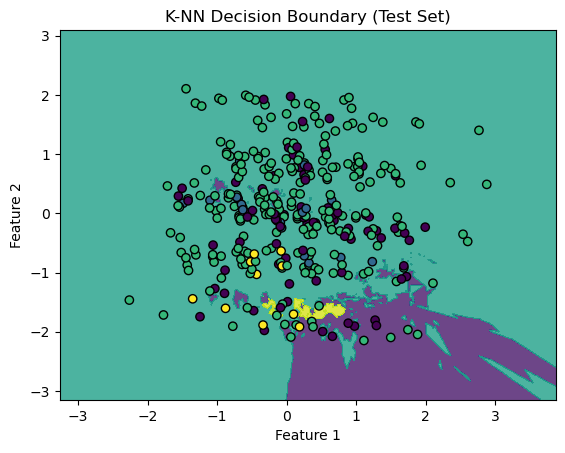

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("car.data")

# Encode categorical features
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

# Split the dataset into features and labels
X = data.iloc[:, :-1]  # All columns except the last one (features)
y = data.iloc[:, -1]   # The last column (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Determine the optimal K value
import math
k_value = int(math.sqrt(len(y_test)))
print(f"Optimal K value (approx): {k_value}")

# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=k_value, p=2, metric='euclidean')
classifier.fit(X_train_pca, y_train)

# Predict the test results
y_pred = classifier.predict(X_test_pca)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plotting decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary for training set
plot_decision_boundary(X_train_pca, y_train, classifier, 'K-NN Decision Boundary (Training Set)')

# Plot decision boundary for test set
plot_decision_boundary(X_test_pca, y_test, classifier, 'K-NN Decision Boundary (Test Set)')
